# Machine Learning - Grid Search CV

## Import Libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Load Data

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Grid Search CV

In [3]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [4]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_estimator = grid_search.best_estimator_
print("Best estimator:", best_estimator)
accuracy = best_estimator.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best parameters: {'C': 1, 'kernel': 'linear'}
Best estimator: SVC(C=1, kernel='linear')
Accuracy on test set: 1.0


In [5]:
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']

for params, mean_score in zip(cv_results['params'], mean_scores):
    print(f"Parameters: {params}, Mean Score: {mean_score}")

Parameters: {'C': 0.1, 'kernel': 'linear'}, Mean Score: 0.9416666666666667
Parameters: {'C': 0.1, 'kernel': 'poly'}, Mean Score: 0.95
Parameters: {'C': 0.1, 'kernel': 'rbf'}, Mean Score: 0.8916666666666668
Parameters: {'C': 1, 'kernel': 'linear'}, Mean Score: 0.9583333333333334
Parameters: {'C': 1, 'kernel': 'poly'}, Mean Score: 0.95
Parameters: {'C': 1, 'kernel': 'rbf'}, Mean Score: 0.95
Parameters: {'C': 10, 'kernel': 'linear'}, Mean Score: 0.95
Parameters: {'C': 10, 'kernel': 'poly'}, Mean Score: 0.9333333333333333
Parameters: {'C': 10, 'kernel': 'rbf'}, Mean Score: 0.95


## Results visualization

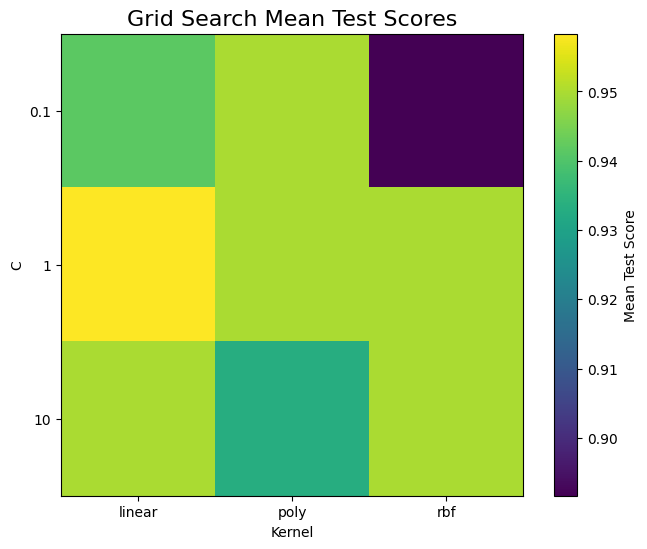

In [6]:
mean_scores = grid_search.cv_results_['mean_test_score']
mean_scores = np.array(mean_scores).reshape(len(param_grid['C']), len(param_grid['kernel']))

plt.figure(figsize=(8, 6))
plt.imshow(mean_scores, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Mean Test Scores', fontsize=16)
plt.xlabel('Kernel')
plt.ylabel('C')
plt.xticks(np.arange(len(param_grid['kernel'])), param_grid['kernel'])
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.colorbar(label='Mean Test Score')
plt.show()